In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import sys
sys.path.append('..')
from sentiment.scrape_utils import finviz_utils as fu, motley_utils as mu, reddit_utils as ru, article_utils as au, data_utils as du
import pandas as pd
from loguru import logger
from sentiment.nlp_utils import tagging_utils as tu

In [2]:
logger.remove()
logger.add(sys.stdout, level="WARNING")

1

In [3]:
finviz_data = fu.get_ticker_info('AAPL')
finviz_data.keys()

dict_keys(['ratings', 'news'])

In [4]:
finviz_data['ratings'].head()

date      update            analyst    position       target  \
0 2021-01-25  Reiterated            Wedbush  Outperform  $160 → $175   
1 2021-01-22  Reiterated              Cowen  Outperform  $133 → $153   
2 2021-01-21  Reiterated     Morgan Stanley  Overweight  $144 → $152   
3 2021-01-05  Reiterated  Canaccord Genuity         Buy  $145 → $150   
4 2020-12-16  Reiterated     Morgan Stanley  Overweight  $136 → $144   

   low_target  high_target  
0       160.0        175.0  
1       133.0        153.0  
2       144.0        152.0  
3       145.0        150.0  
4       136.0        144.0

In [5]:
finviz_data['news']

date                                              title  \
0  2021-01-25 23:04:00  Dow Jones Futures: Stock Market Rally Plunges,...   
1  2021-01-25 22:24:00  Tencent Tumbles After Stock Approached $1 Tril...   
2  2021-01-25 21:18:00  Apple's Hardware Engineering Chief To Step Dow...   
3  2021-01-25 19:14:00  Apples Hardware Chief Leaves Post For Unnamed ...   
4  2021-01-25 18:29:00  Google Pressed In Lawsuit To Dump Telegram Jus...   
..                 ...                                                ...   
95 2021-01-22 09:22:00  Developer Complains To Eu Over Apple, Google A...   
96 2021-01-22 09:18:00  Developer Complains To Eu Over Apple, Google A...   
97 2021-01-22 09:00:00  Buy Microsoft Stock Before Earnings For Breako...   
98 2021-01-22 09:00:00  Apple Could Report Its First $100 Billion Quar...   
99 2021-01-22 08:31:00  Seagate (stx) Q2 Earnings Beat Estimates, Reve...   

                                                 link  
0   https://www.investors.com/market-trend/stock-m...  
1   https://finance.yahoo.com/news/tencent-nears-1...  
2   https://finance.yahoo.com/news/apples-hardware...  
3   https://finance.yahoo.com/news/apple-says-hard...  
4   https://finance.yahoo.com/news/google-pressed-...  
..                                                ...  
95  https://finance.yahoo.com/news/developer-compl...  
96  https://finance.yahoo.com/news/developer-compl...  
97  https://finance.yahoo.com/news/buy-microsoft-s...  
98  https://www.fool.com/investing/2021/01/22/appl...  
99  https://finance.yahoo.com/news/seagate-stx-q2-...  

[100 rows x 3 columns]

In [6]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].unique().tolist()

In [7]:
multiple_news = fu.multiple_tickers_news_df(tickers)
multiple_news.shape

ZTS: 100%|██████████| 505/505 [01:37<00:00,  5.18it/s]  


(50200, 4)

In [8]:
multiple_news['source'] = multiple_news['link'].apply(lambda x: x.split('/')[2].split('.')[1])
multiple_news.groupby('source').apply(lambda x: x['link'].nunique()).sort_values()

source
morningstar         1
rigzone             1
ft                  6
finance            11
com                17
bizjournals       153
investopedia      330
moodys            410
thestreet         720
marketwatch       875
investors        1064
barrons          1361
fool             3246
yahoo           34715
dtype: int64

In [10]:
earnings_links = mu.get_earnings_calls()
motley_transcript = mu.get_transcript_data(earnings_links[0])
print(motley_transcript.keys())

odict_keys(['publication_date', 'fiscal_quarter', 'fiscal_year', 'call_date', 'exchange', 'ticker', 'content', 'company'])


In [11]:
motley_transcripts = mu.get_transcripts_data(earnings_links)
transcripts_data = pd.DataFrame(motley_transcripts).T
transcripts_data.sample(10)

/earnings/call-transcripts/2021/01/22/regions-financial-corp-rf-q4-2020-earnings-call-tr/: 100%|██████████| 20/20 [00:14<00:00,  1.34it/s]


publication_date  \
/earnings/call-transcripts/2021/01/25/servisfir... 2021-01-25 21:00:00   
/earnings/call-transcripts/2021/01/22/regions-f... 2021-01-22 15:00:00   
/earnings/call-transcripts/2021/01/22/huntingto... 2021-01-22 16:30:00   
/earnings/call-transcripts/2021/01/22/independe... 2021-01-22 15:30:00   
/earnings/call-transcripts/2021/01/22/bank-ozk-... 2021-01-22 18:00:00   
/earnings/call-transcripts/2021/01/25/koninklij... 2021-01-25 13:30:00   
/earnings/call-transcripts/2021/01/22/schlumber... 2021-01-22 18:00:00   
/earnings/call-transcripts/2021/01/25/ofg-banco... 2021-01-25 13:30:00   
/earnings/call-transcripts/2021/01/22/kansas-ci... 2021-01-22 17:30:00   
/earnings/call-transcripts/2021/01/25/boot-barn... 2021-01-25 22:30:00   

                                                   fiscal_quarter fiscal_year  \
/earnings/call-transcripts/2021/01/25/servisfir...              4        2020   
/earnings/call-transcripts/2021/01/22/regions-f...              4        2020   
/earnings/call-transcripts/2021/01/22/huntingto...              4        2020   
/earnings/call-transcripts/2021/01/22/independe...              4        2020   
/earnings/call-transcripts/2021/01/22/bank-ozk-...              4        2021   
/earnings/call-transcripts/2021/01/25/koninklij...              4        2020   
/earnings/call-transcripts/2021/01/22/schlumber...              4        2020   
/earnings/call-transcripts/2021/01/25/ofg-banco...              4        2020   
/earnings/call-transcripts/2021/01/22/kansas-ci...              4        2020   
/earnings/call-transcripts/2021/01/25/boot-barn...              3        2021   

                                                             call_date  \
/earnings/call-transcripts/2021/01/25/servisfir... 2021-01-25 05:15:00   
/earnings/call-transcripts/2021/01/22/regions-f... 2021-01-22 11:00:00   
/earnings/call-transcripts/2021/01/22/huntingto... 2021-01-22 08:30:00   
/earnings/call-transcripts/2021/01/22/independe... 2021-01-22 10:00:00   
/earnings/call-transcripts/2021/01/22/bank-ozk-... 2021-01-22 11:00:00   
/earnings/call-transcripts/2021/01/25/koninklij... 2021-01-25 04:00:00   
/earnings/call-transcripts/2021/01/22/schlumber... 2021-01-22 08:30:00   
/earnings/call-transcripts/2021/01/25/ofg-banco... 2021-01-25 10:00:00   
/earnings/call-transcripts/2021/01/22/kansas-ci... 2021-01-22 08:45:00   
/earnings/call-transcripts/2021/01/25/boot-barn... 2021-01-25 04:30:00   

                                                   exchange ticker  \
/earnings/call-transcripts/2021/01/25/servisfir...   NASDAQ   SFBS   
/earnings/call-transcripts/2021/01/22/regions-f...     NYSE     RF   
/earnings/call-transcripts/2021/01/22/huntingto...   NASDAQ   HBAN   
/earnings/call-transcripts/2021/01/22/independe...   NASDAQ   INDB   
/earnings/call-transcripts/2021/01/22/bank-ozk-...   NASDAQ    OZK   
/earnings/call-transcripts/2021/01/25/koninklij...     NYSE    PHG   
/earnings/call-transcripts/2021/01/22/schlumber...     NYSE    SLB   
/earnings/call-transcripts/2021/01/25/ofg-banco...     NYSE    OFG   
/earnings/call-transcripts/2021/01/22/kansas-ci...     NYSE    KSU   
/earnings/call-transcripts/2021/01/25/boot-barn...     NYSE   BOOT   

                                                                                              content  \
/earnings/call-transcripts/2021/01/25/servisfir...  {'contents': 'Contents:
', 'prepared remarks':...   
/earnings/call-transcripts/2021/01/22/regions-f...  {'contents': 'Contents:
', 'prepared remarks':...   
/earnings/call-transcripts/2021/01/22/huntingto...  {'contents': 'Contents:
', 'prepared remarks':...   
/earnings/call-transcripts/2021/01/22/independe...  {'contents': 'Contents:
', 'prepared remarks':...   
/earnings/call-transcripts/2021/01/22/bank-ozk-...  {'contents': 'Contents:
', 'prepared remarks':...   
/earnings/call-transcripts/2021/01/25/koninklij...  {'contents': 'Contents:
', 'prepared remarks':...   
/earnings/call-transcripts

In [12]:
pd.DataFrame(transcripts_data['content'].values.tolist(), index=transcripts_data.index)

contents  \
/earnings/call-transcripts/2021/01/25/heartland...  Contents:\n   
/earnings/call-transcripts/2021/01/25/boot-barn...  Contents:\n   
/earnings/call-transcripts/2021/01/25/servisfir...  Contents:\n   
/earnings/call-transcripts/2021/01/25/bank-of-h...  Contents:\n   
/earnings/call-transcripts/2021/01/25/kimberly-...  Contents:\n   
/earnings/call-transcripts/2021/01/25/community...  Contents:\n   
/earnings/call-transcripts/2021/01/25/ofg-banco...  Contents:\n   
/earnings/call-transcripts/2021/01/25/cadence-b...  Contents:\n   
/earnings/call-transcripts/2021/01/25/koninklij...  Contents:\n   
/earnings/call-transcripts/2021/01/22/first-haw...  Contents:\n   
/earnings/call-transcripts/2021/01/22/western-a...  Contents:\n   
/earnings/call-transcripts/2021/01/22/bank-ozk-...  Contents:\n   
/earnings/call-transcripts/2021/01/22/schlumber...  Contents:\n   
/earnings/call-transcripts/2021/01/22/kansas-ci...  Contents:\n   
/earnings/call-transcripts/2021/01/22/new-orien...  Contents:\n   
/earnings/call-transcripts/2021/01/22/ally-fina...  Contents:\n   
/earnings/call-transcripts/2021/01/22/huntingto...  Contents:\n   
/earnings/call-transcripts/2021/01/22/banner-co...  Contents:\n   
/earnings/call-transcripts/2021/01/22/independe...  Contents:\n   
/earnings/call-transcripts/2021/01/22/regions-f...  Contents:\n   

                                                                                     prepared remarks  \
/earnings/call-transcripts/2021/01/25/heartland...  Prepared Remarks:\nOperator\nGreetings and wel...   
/earnings/call-transcripts/2021/01/25/boot-barn...  Prepared Remarks:\nOperator\nGood day, everyon...   
/earnings/call-transcripts/2021/01/25/servisfir...  Prepared Remarks:\nOperator\nGood day, and wel...   
/earnings/call-transcripts/2021/01/25/bank-of-h...  Prepared Remarks:\nOperator\nLadies and gentle...   
/earnings/call-transcripts/2021/01/25/kimberly-...  Prepared Remarks:\nOperator\nLadies and gentle...   
/earnings/call-transcripts/2021/01/25/community...  Prepared Remarks:\nOperator\nWelcome to the Co...   
/earnings/call-transcripts/2021/01/25/ofg-banco...  Prepared Remarks:\nOperator\nGood morning. Tha...   
/earnings/call-transcripts/2021/01/25/cadence-b...  Prepared Remarks:\nOperator\nWelcome to the Ca...   
/earnings/call-transcripts/2021/01/25/koninklij...  Prepared Remarks:\nOperator\nWelcome to the Ro...   
/earnings/call-transcripts/2021/01/22/first-haw...  Prepared Remarks:\nOperator\nLadies and gentle...   
/earnings/call-transcripts/2021/01/22/western-a...  Prepared Remarks:\nOperator\nGood day, everyon...   
/earnings/call-transcripts/2021/01/22/bank-ozk-...  Prepared Remarks:\nOperator\nLadies and gentle...   
/earnings/call-transcripts/2021/01/22/schlumber...  Prepared Remarks:\nOperator\nLadies and gentle...   
/earnings/call-transcripts/2021/01/22/kansas-ci...  Prepared Remarks:\nOperator\nGood morning and ...   
/earnings/call-transcripts/2021/01/22/new-orien...  Prepared Remarks:\nOperator\nGood evening, and...   
/earnings/call-transcripts/2021/01/22/ally-fina...  Prepared Remarks:\nOperator\nLadies and gentle...   
/earnings/call-transcripts/2021/01/22/huntingto...  Prepared Remarks:\nOperator\nGreetings, and we...   
/earnings/call-transcripts/2021/01/22/banner-co...  Prepared Remarks:\nOperator\nGood day and welc...   
/earnings/call-transcripts/2021/01/22/independe...  Prepared Remarks:\nOperator\nGood morning and ...   
/earnings/call-transcripts/2021/01/22/regions-f...  Prepared Remarks:\nOperator\nGood morning and ...   

                                                                                questions and answers  \
/earnings/call-transcripts/2021/01/25/heartland...  Questions and Answers:\nOperator\nThank you. [...   
/earnings/call-transcripts/2021/01/25/boot-barn...  Questions and Answers:\nOperator\nThank you. [...   
/earnings/call-transcripts/2021/01/25/servisfir...  Questions and Answers:\nOperator\nWe will now ...   
/earnings/call-transc

In [35]:
links = pd.Series(multiple_news['link'].unique()).sample(10)

In [37]:
data = au.multi_site_articles(links)
data_df = pd.DataFrame(data).T
data_df.head(10)

https://finance.yahoo.com/news/hidden-valley-ranch-now-available-110000837.html:  20%|██        | 2/10 [00:00<00:02,  2.75it/s]

2021-01-25 23:58:23.501 | WARNING  | sentiment.scrape_utils.article_utils:yahoo:70 - Failed to parse data for yahoo article: https://finance.yahoo.com/news/hidden-valley-ranch-now-available-110000837.html


https://finance.yahoo.com/news/zimmer-biomet-hospital-special-surgery-120000145.html:  40%|████      | 4/10 [00:01<00:02,  2.82it/s]  

2021-01-25 23:58:24.194 | WARNING  | sentiment.scrape_utils.article_utils:yahoo:70 - Failed to parse data for yahoo article: https://finance.yahoo.com/news/zimmer-biomet-hospital-special-surgery-120000145.html


https://finance.yahoo.com/news/ameren-named-top-company-environmental-131500515.html:  80%|████████  | 8/10 [00:02<00:00,  2.91it/s]                                                                                                                

2021-01-25 23:58:25.525 | WARNING  | sentiment.scrape_utils.article_utils:yahoo:70 - Failed to parse data for yahoo article: https://finance.yahoo.com/news/ameren-named-top-company-environmental-131500515.html


https://finance.yahoo.com/news/hewlett-packards-earnings-outlook-150638520.html: 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]    


content  \
https://finance.yahoo.com/news/alaska-air-alk-a...  Alaska Air Group’s ALK subsidiary Alaska Airli...   
https://finance.yahoo.com/news/aptiv-plc-nyse-a...  Does the July share price for Aptiv PLC (NYSE:...   
https://finance.yahoo.com/news/hidden-valley-ra...  America's #1 ranch brand delivers on increasin...   
https://finance.yahoo.com/news/viacomcbs-viac-r...  ViacomCBS VIAC recently announced that it will...   
https://finance.yahoo.com/news/zimmer-biomet-ho...  Care Pathways Will Enable Patients and Practic...   
https://finance.yahoo.com/news/3-investing-fact...  If you do not make a required minimum distribu...   
https://www.fool.com/earnings/call-transcripts/...  Image source: The Motley Fool.\nAir Products &...   
https://finance.yahoo.com/news/schwab-fundament...  Having trouble finding a Non US - Equity fund?...   
https://finance.yahoo.com/news/ameren-named-top...  DiversityINC® recognizes company for inaugural...   
https://finance.yahoo.com/news/hewlett-packards...  Hewlett Packard (NYSE:HPE) announces its next ...   

                                                                      author  \
https://finance.yahoo.com/news/alaska-air-alk-a...     Zacks Equity Research   
https://finance.yahoo.com/news/aptiv-plc-nyse-a...            Simply Wall St   
https://finance.yahoo.com/news/hidden-valley-ra...                      None   
https://finance.yahoo.com/news/viacomcbs-viac-r...     Zacks Equity Research   
https://finance.yahoo.com/news/zimmer-biomet-ho...                      None   
https://finance.yahoo.com/news/3-investing-fact...     Zacks Equity Research   
https://www.fool.com/earnings/call-transcripts/...  Motley Fool Transcribers   
https://finance.yahoo.com/news/schwab-fundament...     Zacks Equity Research   
https://finance.yahoo.com/news/ameren-named-top...                      None   
https://finance.yahoo.com/news/hewlett-packards...         Benzinga Insights   

                                                                  date length  \
https://finance.yahoo.com/news/alaska-air-alk-a... 2020-11-24 03:29:00      2   
https://finance.yahoo.com/news/aptiv-plc-nyse-a... 2020-07-31 08:54:00      6   
https://finance.yahoo.com/news/hidden-valley-ra... 2021-01-14 06:00:00      4   
https://finance.yahoo.com/news/viacomcbs-viac-r... 2021-01-20 09:17:00      4   
https://finance.yahoo.com/news/zimmer-biomet-ho... 2020-12-09 07:00:00      7   
https://finance.yahoo.com/news/3-investing-fact... 2020-01-28 09:12:00      4   
https://www.fool.com/earnings/call-transcripts/... 2020-07-23 20:31:00    NaN   
https://finance.yahoo.com/news/schwab-fundament... 2021-01-13 07:00:00      4   
https://finance.yahoo.com/news/ameren-named-top... 2020-11-24 08:15:00      2   
https://finance.yahoo.com/news/hewlett-packards... 2020-11-30 10:06:00      2   

                                                    category  \
https://finance.yahoo.com/news/alaska-air-alk-a...       NaN   
https://finance.yahoo.com/news/aptiv-plc-nyse-a...       NaN   
https://finance.yahoo.com/news/hidden-valley-ra...       NaN   
https://finance.yahoo.com/news/viacomcbs-viac-r...       NaN   
https://finance.yahoo.com/news/zimmer-biomet-ho...       NaN   
https://finance.yahoo.com/news/3-investing-fact...       NaN   
https://www.fool.com/earnings/call-transcripts/...  earnings   
https://finance.yahoo.com/news/schwab-fundament...       NaN   
https://finance.yahoo.com/news/ameren-named-top...       NaN   
https://finance.yahoo.com/news/hewlett-packards...       NaN   

                                                                                                title  \
https://finance.yahoo.com/news/alaska-air-alk-a...                                                NaN   
https://finance.yahoo.com/news/aptiv-plc-nyse-a...                                                NaN   
https://finance.yahoo.com/news/hidden-valley-ra...                                                NaN   
https://finance.yahoo.com/news/viacomcbs

In [17]:
links = pd.Series(multiple_news[multiple_news['source'] == 'investopedia']['link'].unique()).sample(100).values

In [18]:
links

array(['https://www.investopedia.com/delta-air-lines-dal-could-take-off-after-upgrade-5096153?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral',
       'https://www.investopedia.com/the-green-new-deal-explained-4588463?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral',
       'https://www.investopedia.com/commodity-inflation-hitting-food-stocks-5095508?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral',
       'https://www.investopedia.com/microsoft-makes-azure-digital-twins-generally-available-5090654?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral',
       'https://www.investopedia.com/news/qualcomm-has-lots-lose-china-trade-war/?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral',
       'https://www.investopedia.com/3-software-stocks-gaining-momentum-5070958?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral',
       'https://www.investopedia.com/u-s-home-sales-prices-continue-to-rise-5093822?utm_campaign=quo

In [19]:
data = au.investopedia_articles(links)
data_df = pd.DataFrame(data).T
data_df.head()

https://www.investopedia.com/articles/markets/081516/top-5-furniture-stocks-2016-stly-bset.asp?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral:  79%|███████▉  | 79/100 [00:11<00:03,  6.25it/s]                   

2021-01-25 23:41:46.208 | WARNING  | sentiment.scrape_utils.article_utils:investopedia:300 - Failed to find breadcrumps for investopedia article: https://www.investopedia.com/articles/markets/081516/top-5-furniture-stocks-2016-stly-bset.asp?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral
2021-01-25 23:41:46.211 | WARNING  | sentiment.scrape_utils.article_utils:investopedia:326 - Failed to find metadata for investopedia article: https://www.investopedia.com/articles/markets/081516/top-5-furniture-stocks-2016-stly-bset.asp?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral
2021-01-25 23:41:46.215 | WARNING  | sentiment.scrape_utils.article_utils:investopedia:334 - Failed to find content block for investopedia article: https://www.investopedia.com/articles/markets/081516/top-5-furniture-stocks-2016-stly-bset.asp?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral


https://www.investopedia.com/bank-of-america-bac-retreats-after-mixed-report-5095945?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral: 100%|██████████| 100/100 [00:17<00:00,  5.59it/s]                              


categories  \
https://www.investopedia.com/delta-air-lines-da...                               [News, Company News]   
https://www.investopedia.com/the-green-new-deal...  [Sustainable Investing, Socially Responsible I...   
https://www.investopedia.com/commodity-inflatio...                               [News, Company News]   
https://www.investopedia.com/microsoft-makes-az...                               [News, Company News]   
https://www.investopedia.com/news/qualcomm-has-...                              [Stocks, Tech Stocks]   

                                                             author  \
https://www.investopedia.com/delta-air-lines-da...   Justin Kuepper   
https://www.investopedia.com/the-green-new-deal...   Deborah Dsouza   
https://www.investopedia.com/commodity-inflatio...      Alan Farley   
https://www.investopedia.com/microsoft-makes-az...  Mark Kolakowski   
https://www.investopedia.com/news/qualcomm-has-...   Donna Fuscaldo   

                                                         date  \
https://www.investopedia.com/delta-air-lines-da... 2021-01-20   
https://www.investopedia.com/the-green-new-deal... 2020-10-08   
https://www.investopedia.com/commodity-inflatio... 2021-01-14   
https://www.investopedia.com/microsoft-makes-az... 2020-12-09   
https://www.investopedia.com/news/qualcomm-has-... 2021-01-12   

                                                                                                title  \
https://www.investopedia.com/delta-air-lines-da...  Delta Air Lines (dal) Could Take Off After Upg...   
https://www.investopedia.com/the-green-new-deal...                       The Green New Deal Explained   
https://www.investopedia.com/commodity-inflatio...            Commodity Inflation Hitting Food Stocks   
https://www.investopedia.com/microsoft-makes-az...  Microsoft (msft) Makes Azure Digital Twins Gen...   
https://www.investopedia.com/news/qualcomm-has-...  Qualcomm Has Plenty To Lose In A U.s-china Tra...   

                                                                                             subtitle  \
https://www.investopedia.com/delta-air-lines-da...                                                      
https://www.investopedia.com/the-green-new-deal...  This call to end fossil fuels and build green ...   
https://www.investopedia.com/commodity-inflatio...                                                      
https://www.investopedia.com/microsoft-makes-az...                                                      
https://www.investopedia.com/news/qualcomm-has-...                                                      

                                                                                              content  \
https://www.investopedia.com/delta-air-lines-da...  Delta Air Lines, Inc. (DAL) shares rose 2% dur...   
https://www.investopedia.com/the-green-new-deal...  The term “Green New Deal” was first used by Pu...   
https://www.investopedia.com/commodity-inflatio...  Food stocks are underperforming so far this ye...   
https://www.investopedia.com/microsoft-makes-az...  Microsoft Corporation (MSFT) has announced tha...   
https://www.investopedia.com/news/qualcomm-has-...  As President Donald Trump ramped up the trade ...   

                                                                               tickers  
https://www.investopedia.com/delta-air-lines-da...                               {DAL}  
https://www.investopedia.com/the-green-new-deal...          {AES, DAR, NRG, REGI, XEL}  
https://www.investopedia.com/commodity-inflatio...  {GIS, TNX, K, DBA, BYND, CPB, HRL}  
https://www.investopedia.com/microsoft-makes-az...                     {IT, MSFT, JCI}  
https://www.investopedia.com/news/qualcomm-has-...                        {QCOM, NXPI}

In [21]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, https://www.investopedia.com/delta-air-lines-dal-could-take-off-after-upgrade-5096153?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral to https://www.investopedia.com/bank-of-america-bac-retreats-after-mixed-report-5095945?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   categories  99 non-null     object        
 1   author      99 non-null     object        
 2   date        99 non-null     datetime64[ns]
 3   title       99 non-null     object        
 4   subtitle    99 non-null     object        
 5   content     99 non-null     object        
 6   tickers     100 non-null    object        
dtypes: datetime64[ns](1), object(6)
memory usage: 6.2+ KB


In [ ]:
data_df.shape

In [ ]:
data_df[data_df['date'].isna()]

In [ ]:
import datetime
import re
import string
import time
from collections import OrderedDict
from typing import Any, Dict, List, Optional, Union

import bs4
import requests
from bs4 import BeautifulSoup

1. Category(ies?)
2. Author
3. Date
4. Title
5. Content
6. Tickers

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko)'
                  ' Chrome/58.0.3029.110 Safari/537.36'
}
res = requests.get("https://www.marketwatch.com/story/cboe-to-delay-reopening-of-chicago-options-trading-floor-by-one-week-2020-06-03?siteid=yhoof2")
res.raise_for_status()
soup = BeautifulSoup(res.text, 'html.parser')
data = dict()

In [ ]:
if article_meta := soup.find('div', attrs={'class': 'article__masthead'}):
    if date := article_meta.find('time'):
        date_clean = date.text.replace('.', '').split(': ')[-1].strip()
        if date_obj := _validate_date(date, "%B %d, %Y at %I:%M %p ET"):
            data['date'] = date_obj

In [38]:
for i in fu.ticker_news_stream(tickers):
    print(i)

ZTS: 100%|██████████| 505/505 [01:19<00:00,  6.34it/s]  


(Timestamp('2020-05-05 11:45:00'), 'Drug/biotech Stock Q1 Earnings Due On May 6: Zts, Alxn & More', 'https://finance.yahoo.com/news/drug-biotech-stock-q1-earnings-154503551.html', 'ZTS')
(Timestamp('2020-05-06 07:00:00'), 'Zoetis Announces First Quarter 2020 Results', 'https://finance.yahoo.com/news/zoetis-announces-first-quarter-2020-110000614.html', 'ZTS')
(Timestamp('2020-05-06 08:35:00'), 'Zoetis (zts) Q1 Earnings And Revenues Top Estimates', 'https://finance.yahoo.com/news/zoetis-zts-q1-earnings-revenues-123512288.html', 'ZTS')
(Timestamp('2020-05-06 11:23:00'), 'Animal-care Company Zoetis Had A Solid First Quarter. It Expects To Take A Hit In The Next Quarter.', 'https://www.barrons.com/articles/animal-care-company-zoetis-had-a-solid-first-quarter-it-expects-to-take-a-hit-in-the-next-quarter-51588778594?siteid=yhoof2', 'ZTS')
(Timestamp('2020-05-06 13:22:00'), "Zoetis' (zts) Q1 Earnings Beat Estimates, Revenues In Line", 'https://finance.yahoo.com/news/zoetis-zts-q1-earnings-beat

(Timestamp('2021-01-20 16:56:00'), "Is Kroger Stock A Buy Right Now? Here's What Earnings, Charts Show", 'https://www.investors.com/research/kroger-stock-buy-now/?src=A00220', 'WM')
(Timestamp('2021-01-13 17:45:00'), 'Walt Disney (dis) Gains But Lags Market: What You Should Know', 'https://finance.yahoo.com/news/walt-disney-dis-gains-lags-224510979.html', 'DIS')
(Timestamp('2021-01-14 06:00:00'), 'Influencers With Andy Serwer: Haim Saban', 'https://finance.yahoo.com/video/influencers-andy-serwer-haim-saban-110000035.html', 'DIS')
(Timestamp('2021-01-14 08:01:00'), 'Stan Lee Shows You How To Invent Your Own Marvelous Universe', 'https://www.investors.com/news/management/leaders-and-success/stan-lee-shows-how-to-invent-your-own-marvelous-universe/?src=A00220', 'DIS')
(Timestamp('2021-01-14 09:00:00'), 'Get Ready To Meet Your New Best Friends: Disney Nuimos', 'https://finance.yahoo.com/news/ready-meet-best-friends-disney-140000332.html', 'DIS')
(Timestamp('2021-01-14 10:45:00'), "Electron

(Timestamp('2020-11-04 11:10:00'), 'Transport Etfs In Focus On Spate Of Dismal Q3 Earnings Reports', 'https://finance.yahoo.com/news/transport-etfs-focus-spate-dismal-161004463.html', 'UNP')
(Timestamp('2020-11-05 16:16:00'), 'Union Pacific Corporation Declares Fourth Quarter 2020 Dividend', 'https://finance.yahoo.com/news/union-pacific-corporation-declares-fourth-211600364.html', 'UNP')
(Timestamp('2020-11-08 03:29:00'), 'Should You Invest In The Fidelity Msci Industrials Index Etf (fidu)?', 'https://finance.yahoo.com/news/invest-fidelity-msci-industrials-index-082908113.html', 'UNP')
(Timestamp('2020-11-11 08:00:00'), 'Union Pacific Corporation Executives To Address The Stephens Annual Investment Conference 2020', 'https://finance.yahoo.com/news/union-pacific-corporation-executives-address-130000866.html', 'UNP')
(Timestamp('2020-11-12 06:20:00'), 'Should You Invest In The Fidelity Msci Industrials Index Etf (fidu)?', 'https://finance.yahoo.com/news/invest-fidelity-msci-industrials-i

(Timestamp('2020-10-13 08:00:00'), 'New Gige And Usb3 Cameras Designed For Use In Challenging Lighting Conditions', 'https://finance.yahoo.com/news/gige-usb3-cameras-designed-challenging-120000496.html', 'TDY')
(Timestamp('2020-10-14 08:00:00'), 'Teledyne Announces Third Quarter 2020 Earnings Webcast Details', 'https://finance.yahoo.com/news/teledyne-announces-third-quarter-2020-120000296.html', 'TDY')
(Timestamp('2020-10-14 11:09:00'), "Is Teledyne Technologies' (nyse:tdy) Share Price Gain Of 280% Well Earned?", 'https://finance.yahoo.com/news/teledyne-technologies-nyse-tdy-share-150949985.html', 'TDY')
(Timestamp('2020-10-18 20:00:00'), 'Teledyne Dalsas Unrivaled Cmos X-ray Detectors Highlighted At Cmef 2020', 'https://finance.yahoo.com/news/teledyne-dalsa-unrivaled-cmos-x-000000021.html', 'TDY')
(Timestamp('2020-10-19 18:55:00'), 'Teledynes Digital "eyes" Enable Nasas Osiris-rex Mission To See', 'https://finance.yahoo.com/news/teledyne-digital-eyes-enable-nasa-225500602.html', 'TDY'

(Timestamp('2020-11-09 10:45:00'), "Here's Why Simon Property Group, Tanger Outlets, And Other Retail Reits Are Soaring On Monday", 'https://www.fool.com/investing/2020/11/09/heres-why-simon-property-group-tanger-outlets-and/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article', 'SPG')
(Timestamp('2020-11-09 15:15:00'), 'Simon Property Group, Inc. To Host Earnings Call', 'https://finance.yahoo.com/news/simon-property-group-inc-host-201500434.html', 'SPG')
(Timestamp('2020-11-09 16:15:00'), 'Simon Property Group Reports Third Quarter 2020 Results', 'https://finance.yahoo.com/news/simon-property-group-reports-third-211500939.html', 'SPG')
(Timestamp('2020-11-09 17:35:00'), 'Simon Property (spg) Misses Q3 Ffo And Revenue Estimates', 'https://finance.yahoo.com/news/simon-property-spg-misses-q3-223510279.html', 'SPG')
(Timestamp('2020-11-09 17:38:00'), 'Simons Balance Sheet Takes Big Hit In Q3 But Mall Giant Signals Optimism About Stronger Shopper Traffic And 

(Timestamp('2020-12-22 12:55:00'), 'Raytheon Investor Alert: Shareholder Lawsuit Filed', 'https://finance.yahoo.com/news/raytheon-investor-alert-shareholder-lawsuit-175500612.html', 'RTX')
(Timestamp('2020-12-22 13:25:00'), 'The Klein Law Firm Reminds Investors Of Class Actions On Behalf Of Shareholders Of Rtx, Icpt And Hpq', 'https://finance.yahoo.com/news/klein-law-firm-reminds-investors-182500732.html', 'RTX')
(Timestamp('2020-12-22 18:01:00'), 'Kessler Topaz Meltzer & Check, Llp Reminds Shareholders Of Securities Fraud Class Action Lawsuit Filed Against Raytheon Technologies Corporation F/k/a Raytheon Company', 'https://finance.yahoo.com/news/kessler-topaz-meltzer-check-llp-230100534.html', 'RTX')
(Timestamp('2020-12-22 22:50:00'), 'Filing Deadline--kuznicki Law Pllc Announces Class Actions On Behalf Of Shareholders Of Bsx, Rtx And Splk', 'https://finance.yahoo.com/news/filing-deadline-kuznicki-law-pllc-035000122.html', 'RTX')
(Timestamp('2020-12-23 13:31:00'), 'Rtx Dec. 29 Deadlin

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(Timestamp('2020-12-01 14:52:00'), '15 Largest Fmcg Companies In The World', 'https://finance.yahoo.com/news/15-largest-fmcg-companies-world-195256485.html', 'KO')
(Timestamp('2020-12-02 10:29:00'), 'The Nbas Business Model', 'https://www.investopedia.com/articles/investing/070715/nbas-business-model.asp?utm_campaign=quote-yahoo&utm_source=yahoo&utm_medium=referral', 'KO')
(Timestamp('2020-12-04 06:00:00'), 'Value Stock Rally Buoys Dividend Payers Returns. Can The Gains Go On?', 'https://www.barrons.com/articles/value-stock-rally-buoys-dividend-payers-returns-51607079602?siteid=yhoof2', 'KO')
(Timestamp('2020-12-04 06:46:00'), 'Could Coca-cola Be A Millionaire Maker Stock?', 'https://www.fool.com/investing/2020/12/04/could-coca-cola-be-a-millionaire-maker-stock/?source=eptyholnk0000202&utm_source=yahoo-host&utm_medium=feed&utm_campaign=article', 'KO')
(Timestamp('2020-12-04 13:40:00'), 'Molson Coors Just Launched Its First Cbd Drinks In The Us', 'https://finance.yahoo.com/news/molson-c

(Timestamp('2020-09-24 06:49:00'), 'New Strong Buy Stocks For September 24th', 'https://finance.yahoo.com/news/strong-buy-stocks-september-24th-104910817.html', 'CDW')
(Timestamp('2020-09-29 15:47:00'), "Cdw Corporation -- Moody's Announces Completion Of A Periodic Review Of Ratings Of Cdw Corporation", 'http://www.moodys.com/page/viewresearchdoc.aspx?docid=PR_432276&cid=HFGG75LYEO30', 'CDW')
(Timestamp('2020-10-01 10:08:00'), 'Zacks.com Featured Highlights Include: Cdw Corp, Best Buy, Applied Materials, Nrg Energy And Kla Corp', 'https://finance.yahoo.com/news/zacks-com-featured-highlights-cdw-140802977.html', 'CDW')
(Timestamp('2020-10-02 11:40:00'), 'Cdw Vs. Now: Which Stock Is The Better Value Option?', 'https://finance.yahoo.com/news/cdw-vs-now-stock-better-154003316.html', 'CDW')
(Timestamp('2020-10-09 08:30:00'), 'Cdw Recognized As Microsoft Azure Expert Managed Service Provider To Meet Evolving Customer Needs', 'https://finance.yahoo.com/news/cdw-recognized-microsoft-azure-expe

(Timestamp('2021-01-11 10:38:00'), "Apple Partners With Biogen On Research Into Detecting Early Alzheimer's, Dementia Symptoms", 'https://finance.yahoo.com/news/apple-partners-biogen-research-detecting-153853230.html', 'BIIB')
(Timestamp('2021-01-11 11:00:00'), 'Biib Investor Alert: Bronstein, Gewirtz & Grossman, Llc Reminds Biogen Inc. Shareholders Of Class Action And Lead Plaintiff Deadline: January 12, 2021', 'https://finance.yahoo.com/news/biib-investor-alert-bronstein-gewirtz-160000968.html', 'BIIB')
(Timestamp('2021-01-11 11:00:00'), 'Deadline Alert For Tile, Baba, And Biib: The Law Offices Of Frank R. Cruz Reminds Investors Of Class Actions On Behalf Of Shareholders', 'https://finance.yahoo.com/news/deadline-alert-tile-baba-biib-160000568.html', 'BIIB')
(Timestamp('2021-01-11 11:42:00'), "Biogen's Stock Is Up 5% After Lilly Reports Positive Data From An Alzheimer's Study", 'https://www.marketwatch.com/story/biogens-stock-is-up-5-after-lilly-reports-positive-data-from-an-alzheime

(Timestamp('2020-10-24 08:54:00'), "A. O. Smith Corporation (nyse:aos) Looks Interesting, And It's About To Pay A Dividend", 'https://finance.yahoo.com/news/o-smith-corporation-nyse-aos-125407867.html', 'AOS')
(Timestamp('2020-10-28 10:20:00'), 'Ex-dividend Date Insight: A.o. Smith', 'https://finance.yahoo.com/news/ex-dividend-date-insight-o-142025881.html', 'AOS')
(Timestamp('2020-10-29 06:50:00'), 'A. O. Smith Reports Third Quarter Earnings Of $0.65 Per Share And Upgrades Full Year 2020 Earnings Guidance', 'https://finance.yahoo.com/news/o-smith-reports-third-quarter-105000758.html', 'AOS')
(Timestamp('2020-10-29 07:41:00'), 'A.o. Smith: Q3 Earnings Insights', 'https://finance.yahoo.com/news/o-smith-q3-earnings-insights-114118035.html', 'AOS')
(Timestamp('2020-10-29 08:05:00'), 'A.o. Smith (aos) Q3 Earnings And Revenues Beat Estimates', 'https://finance.yahoo.com/news/o-smith-aos-q3-earnings-120512820.html', 'AOS')
(Timestamp('2020-10-29 09:57:00'), 'A. O. Smith (aos) Q3 Earnings & R

(Timestamp('2020-11-09 11:40:00'), 'Cah Vs. Algn: Which Stock Should Value Investors Buy Now?', 'https://finance.yahoo.com/news/cah-vs-algn-stock-value-164004363.html', 'ALGN')
(Timestamp('2020-11-10 08:07:00'), 'Luminex (lmnx) Declines 6.6% As Q3 Earnings Miss Estimates', 'https://finance.yahoo.com/news/luminex-lmnx-declines-6-6-130701199.html', 'ALGN')
(Timestamp('2020-11-10 08:25:00'), "Myriad Genetics' (mygn) Q1 Earnings & Revenues Top Estimates", 'https://finance.yahoo.com/news/myriad-genetics-mygn-q1-earnings-132501201.html', 'ALGN')
(Timestamp('2020-11-10 08:45:00'), 'Glaukos (gkos) Gains 11.8% Despite Reporting Loss In Q3', 'https://finance.yahoo.com/news/glaukos-gkos-gains-11-8-134501435.html', 'ALGN')
(Timestamp('2020-11-10 10:31:00'), 'Hill-rom (hrc) Q4 Earnings, Revenues Top Estimates, Fall Y/y', 'https://finance.yahoo.com/news/hill-rom-hrc-q4-earnings-153103987.html', 'ALGN')
(Timestamp('2020-11-10 16:46:00'), 'Glaukos (gkos) Beats Estimates On Narrower-than-expected Loss 

ZTS: 100%|██████████| 505/505 [01:19<00:00,  6.38it/s]  


(Timestamp('2021-01-23 04:00:00'), 'The Time To Solve The Electric Cars Battery Problem Is Now', 'https://qz.com/1961619/what-roadblocks-does-the-electric-car-face/?utm_source=YPL', 'GM')


VRSK:  93%|█████████▎| 468/505 [01:14<00:05,  6.25it/s] 


KeyboardInterrupt: 

In [2]:
foo = pd.read_csv('../scraped_data/investing_comments.csv')

In [3]:
foo = foo[['id', 'created_utc', 'subreddit', 'author', 'body']]
foo.dropna(inplace=True)
foo.drop_duplicates(subset=['id', 'subreddit'], inplace=True)
foo = foo[(foo['body'] != '[deleted]') & (foo['body'] != '[removed]')]
foo['created_utc'] = pd.to_datetime(foo['created_utc'], unit='s')
foo.sort_values('created_utc', inplace=True)
print(foo.info())
foo

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259406 entries, 0 to 269634
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           259406 non-null  object        
 1   created_utc  259406 non-null  datetime64[ns]
 2   subreddit    259406 non-null  object        
 3   author       259406 non-null  object        
 4   body         259406 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 11.9+ MB
None


id         created_utc  subreddit                author  \
0       gauwxap 2020-11-02 02:31:49  investing                Pijoto   
1       gauwy48 2020-11-02 02:32:02  investing     InvestingNerd2020   
2       gaux3h2 2020-11-02 02:33:28  investing                SBIN14   
3       gaux550 2020-11-02 02:33:54  investing            cooleddy89   
4       gaux597 2020-11-02 02:33:56  investing  ThenIJizzedInMyPants   
...         ...                 ...        ...                   ...   
269630  gl2486d 2021-01-28 06:34:38  investing          nutbutterfly   
269631  gl24916 2021-01-28 06:34:54  investing       CheeringKitty67   
269632  gl249pi 2021-01-28 06:35:07  investing      tradingonatoilet   
269633  gl24c65 2021-01-28 06:35:54  investing             TryingTed   
269634  gl24dge 2021-01-28 06:36:19  investing             kiwimancy   

                                                     body  
0       EVs and Hydrogen can coexist, imo.  For use ca...  
1       What about the other aspects mentioned?  Free ...  
2       I don’t remember it being that way, but I’m su...  
3       First of all, love the username. Huge fan of N...  
4       glad i could help!\n\nregarding value investin...  
...                                                   ...  
269630             It still has P/E-ratio of way over 40.  
269631                                          How what?  
269632  They are, and thats what i tried to explain to...  
269633  Hedge funds don't band together for pump and d...  
269634  You are long a put which gives you short expos...  

[259406 rows x 5 columns]

In [5]:
foo.head()

author                                               body  \
0    Fear_The_Engineer                                                  Y   
1         viewsonic041  Let's put it this way. Anyone buying NIO at th...   
2  foodforthoughts1919  You don’t know when is the end of a fall or de...   
3            Yahoogone  Yes much of the uptrend is due to J. Powell an...   
4        AutoModerator  Sorry, your [submission](https://www.reddit.co...   

                                           body_html   created_utc  \
0                   <div class="md"><p>Y</p>\n</div>  1.604283e+09   
1  <div class="md"><p>Let&#39;s put it this way. ...  1.604283e+09   
2  <div class="md"><p>You don’t know when is the ...  1.604283e+09   
3  <div class="md"><p>Yes much of the uptrend is ...  1.604283e+09   
4  <div class="md"><p>Sorry, your <a href="https:...  1.604283e+09   

  distinguished edited       id  is_submitter    link_id   parent_id  \
0           NaN  False  gauuio4         False  t3_jksqyk  t1_gauufdn   
1           NaN  False  gauuk8a          True  t3_jmaxm0   t3_jmaxm0   
2           NaN  False  gauuwdg         False  t3_jm1nwn   t3_jm1nwn   
3           NaN  False  gauuwdu         False  t3_jm40gl   t3_jm40gl   
4     moderator  False  gauv3hr         False  t3_jmf3mm   t3_jmf3mm   

                                           permalink  \
0  /r/stocks/comments/jksqyk/rstocks_daily_discus...   
1  /r/stocks/comments/jmaxm0/what_is_a_good_price...   
2  /r/stocks/comments/jm1nwn/for_people_waiting_f...   
3  /r/stocks/comments/jm40gl/how_come_the_us_tota...   
4  /r/stocks/comments/jmf3mm/what_stocks_would_yo...   

                                             replies  score  stickied  \
0  <praw.models.comment_forest.CommentForest obje...      1     False   
1  <praw.models.comment_forest.CommentForest obje...      1     False   
2  <praw.models.comment_forest.CommentForest obje...      1     False   
3  <praw.models.comment_forest.CommentForest obje...      1     False   
4  <praw.models.comment_forest.CommentForest obje...      1     False   

  submission subreddit subreddit_id  
0     jksqyk    stocks     t5_2qjfk  
1     jmaxm0    stocks     t5_2qjfk  
2     jm1nwn    stocks     t5_2qjfk  
3     jm40gl    stocks     t5_2qjfk  
4     jmf3mm    stocks     t5_2qjfk

In [19]:
a = pd.read_csv('wsb_comments.csv')
a

id          created_utc         retrieved_on       subreddit  \
0        gayaaov  2020-11-02 23:59:56  2020-11-03 01:42:58  wallstreetbets   
1        gayaafj  2020-11-02 23:59:52  2020-11-03 01:42:53  wallstreetbets   
2        gayaaep  2020-11-02 23:59:52  2020-11-03 01:42:53  wallstreetbets   
3        gayaa93  2020-11-02 23:59:49  2020-11-03 01:42:51  wallstreetbets   
4        gayaa4x  2020-11-02 23:59:47  2020-11-03 01:42:50  wallstreetbets   
...          ...                  ...                  ...             ...   
3049995  g228ibb  2020-08-19 02:47:13  2020-08-19 05:06:22  wallstreetbets   
3049996  g228i8r  2020-08-19 02:47:12  2020-08-19 05:06:22  wallstreetbets   
3049997  g228i4x  2020-08-19 02:47:11  2020-08-19 05:06:21  wallstreetbets   
3049998  g228hzu  2020-08-19 02:47:08  2020-08-19 05:06:19  wallstreetbets   
3049999  g228hxf  2020-08-19 02:47:07  2020-08-19 05:06:18  wallstreetbets   

                       author  \
0                   jHyGxgYag   
1                   Egg_Empty   
2               Baconstripz69   
3        Covid19KilledEpstein   
4         aRecycleAwayAccount   
...                       ...   
3049995            WSBVoteBot   
3049996          goldensteaks   
3049997    SensibleHumanBeing   
3049998         Joe-MacMillan   
3049999               bkosh13   

                                                      body  
0                     It would've. Check FB in the morning  
1                What money are you actually making on it?  
2                                        No self promoting  
3        Did you two start banging each other’s butts i...  
4        This is an option pricing bot. The latest opti...  
...                                                    ...  
3049995  **I am a bot. Is this submission violating the...  
3049996             Gonna need some salt for NVDA earnings  
3049997                                   Positions or ban  
3049998                                     What a baller.  
3049999  Agreed. I read his posts every morning taking ...  

[3050000 rows x 6 columns]

In [2]:
temp = pd.read_csv('../scraped_data/wsb_comments.csv', usecols=[0, 1, 3, 6, 15])

In [3]:
temp['created_utc'] = pd.to_datetime(temp['created_utc'], unit='s')
temp.sort_values('created_utc', inplace=True)
print(temp.info())
temp

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7974160 entries, 0 to 7974159
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   author       object        
 1   body         object        
 2   created_utc  datetime64[ns]
 3   id           object        
 4   subreddit    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 365.0+ MB
None


author  \
0                   Hubers57   
1                    Sneek88   
2                 dreamsushi   
3               GoBeaversOSU   
4                somanychins   
...                      ...   
7974158         Diogenes1992   
7974155  Buy-High-N-Sell-Low   
7974156              tedclev   
7974157          Phil-Rogers   
7974159             xPyright   

                                                      body  \
0        Nah green open means I sell my calls. Don't re...   
1        That's a rough spot to be in but sounds like y...   
2                              https://imgur.com/a/rlItn6a   
3        Short Term Trade: 1 extra hour of slepp\n\nLon...   
4        Dude you responded to is wrong. ITM is just fi...   
...                                                    ...   
7974158  i'm holding, either we all make money or we al...   
7974155  Yes a retirement account but all my cash is ei...   
7974156  Look at these tiny volume "sell-offs." Fucking...   
7974157                stock markets with bruce on youtube   
7974159                           파이팅! 파이팅! 파이팅! 파이팅! 파이팅!   

                created_utc       id       subreddit  
0       2020-11-02 03:31:45  gav31bk  wallstreetbets  
1       2020-11-02 03:31:46  gav31dd  wallstreetbets  
2       2020-11-02 03:31:46  gav31dp  wallstreetbets  
3       2020-11-02 03:31:48  gav31h5  wallstreetbets  
4       2020-11-02 03:31:49  gav31k9  wallstreetbets  
...                     ...      ...             ...  
7974158 2021-01-28 17:42:44  gl4ejpl  wallstreetbets  
7974155 2021-01-28 17:42:44  gl4ejp4  wallstreetbets  
7974156 2021-01-28 17:42:44  gl4ejp6  wallstreetbets  
7974157 2021-01-28 17:42:44  gl4ejpg  wallstreetbets  
7974159 2021-01-28 17:42:44  gl4ejq7  wallstreetbets  

[7974160 rows x 5 columns]

In [5]:
from sentiment.nlp_utils import tagging_utils as tu

In [6]:
keyword_tagger = tu.tagging_pipeline('keywords')
# tickers = pd.read_csv('ftp://ftp.nasdaqtrader.com/SymbolDirectory/nasdaqtraded.txt', sep='|')
# symbols = tickers['Symbol'].dropna().str.strip().unique().tolist()
symbols = ['GME', 'NOK', 'BB', 'AMC']
temp['body'] = temp['body'].astype(str)
temp = keyword_tagger(temp, symbols, 'body')

100%|██████████| 7974160/7974160 [01:37<00:00, 82080.32it/s] 


<ipython-input-7-9846ae3e8c19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['day'] = temp['created_utc'].dt.date


<AxesSubplot:xlabel='day'>

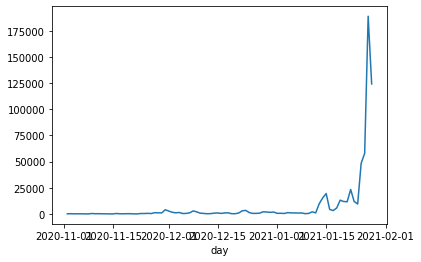

In [7]:
temp = temp[temp['body_keywords'].astype(bool)]
temp['day'] = temp['created_utc'].dt.date
grouped = temp.groupby('day')
grouped.apply(len).plot()

In [8]:
pd.unique([x for i in temp['body_keywords'].tolist() for x in i])

array(['GME', 'AMC', 'NOK', 'BB'], dtype=object)

In [9]:
encoded = tu._multi_hot_encode(temp['body_keywords'].tolist())

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 9)

Text(0.5, 1.0, 'Comments on r/WallStreetbets Containing Symbols')

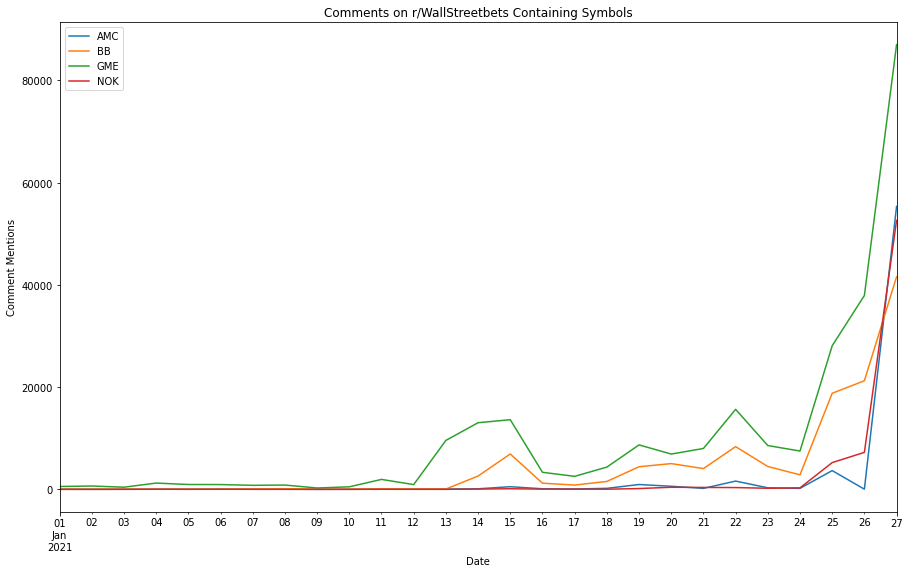

In [35]:
encoded.groupby(pd.Grouper(freq='D')).sum().iloc[60:-1, :].plot()
plt.xlabel('Date')
plt.ylabel("Comment Mentions")
plt.title('Comments on r/WallStreetbets Containing Symbols')

In [21]:
encoded.index = temp['created_utc']

In [20]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621947 entries, 588 to 7974144
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   author         621947 non-null  object        
 1   body           621947 non-null  object        
 2   created_utc    621947 non-null  datetime64[ns]
 3   id             621947 non-null  object        
 4   subreddit      621947 non-null  object        
 5   body_keywords  621947 non-null  object        
 6   day            621947 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 38.0+ MB
